In [1]:
from typing import OrderedDict

import torch
from matplotlib import pyplot as plt

from protocol.BB84Protocol import BB84Protocol
from protocol.BB84TrainableProtocol import BB84TrainableProtocol
from protocol.connection_elements.Layer import Layer
from protocol.connection_elements.Noise import Noise

def experiment(noise_error):
    channel_noise = Noise(noise_error, True)

    print("Classic pipeline")
    pipeline = BB84Protocol(n_bits=500, elements=[channel_noise], seed=0)
    acc, classic_qber = pipeline.run()
    print(f"Accuracy: {acc} QBER: {classic_qber}")

    print("Trained pipeline")
    pipeline_train = BB84TrainableProtocol(n_bits=500, elements=[Layer(), channel_noise, Layer()], seed=0)
    print(f"Start parameters {pipeline_train.get_parameters()}")

    acc, start_qber = pipeline_train.run()
    print(f"Before training: Accuracy: {acc} QBER: {start_qber}")

    for epoch in range(51):
        loss = pipeline_train.train()
        if epoch % 10 == 0:
            print(f'epoch: {epoch}, loss: {loss}')

    print(f"Final parameters {pipeline_train.get_parameters()}")
    acc, final_qber = pipeline_train.run()
    print(f"After training: Accuracy: {acc} QBER: {final_qber}")

    sd = pipeline_train.model.state_dict()
    sd = OrderedDict({k: torch.zeros_like(v) for k, v in sd.items()})
    pipeline_train.model.load_state_dict(sd)
    print(f"Zeroed parameters {pipeline_train.get_parameters()}")
    acc, zeroed_qber = pipeline_train.run()
    print(f"Zeroed mitigation: Accuracy: {acc} QBER: {zeroed_qber}")

    return classic_qber, start_qber, final_qber, zeroed_qber

Noise function: depolarizing_error intensity: 0.1
Classic pipeline
Accuracy: 0.9566929133858267 QBER: 0.04330708661417326
Trained pipeline


/tmp/ipykernel_12179/2687710316.py:20: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  pipeline_train = BB84TrainableProtocol(n_bits=500, elements=[Layer(), channel_noise, Layer()], seed=0)


Start parameters {'x_0': np.float32(-0.3540094), 'y_0': np.float32(-0.7645314), 'z_0': np.float32(-0.39849615), 'x_1': np.float32(-0.35456562), 'y_1': np.float32(-0.01667881), 'z_1': np.float32(-0.9292766)}
Before training: Accuracy: 0.6889763779527559 QBER: 0.3110236220472441
epoch: 0, loss: 0.29861071705818176
epoch: 10, loss: 0.037149541079998016
epoch: 20, loss: 0.0072570377960801125
epoch: 30, loss: 0.0035186964087188244
epoch: 40, loss: 0.0017572027863934636
epoch: 50, loss: 0.0005697243032045662
Final parameters {'x_0': np.float32(-0.033018503), 'y_0': np.float32(-0.36707586), 'z_0': np.float32(0.23027296), 'x_1': np.float32(-0.06785645), 'y_1': np.float32(0.36902398), 'z_1': np.float32(-0.2964131)}
After training: Accuracy: 0.9645669291338582 QBER: 0.03543307086614178
Zeroed parameters {'x_0': np.float32(0.0), 'y_0': np.float32(0.0), 'z_0': np.float32(0.0), 'x_1': np.float32(0.0), 'y_1': np.float32(0.0), 'z_1': np.float32(0.0)}
Zeroed mitigation: Accuracy: 0.9763779527559056 QB

/tmp/ipykernel_12179/2687710316.py:20: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  pipeline_train = BB84TrainableProtocol(n_bits=500, elements=[Layer(), channel_noise, Layer()], seed=0)


Before training: Accuracy: 0.6259842519685039 QBER: 0.37401574803149606
epoch: 0, loss: 0.35505929589271545
epoch: 10, loss: 0.025777142494916916
epoch: 20, loss: 0.007979617454111576
epoch: 30, loss: 0.008911251090466976
epoch: 40, loss: 0.0018643344519659877
epoch: 50, loss: 0.00014258404553402215
Final parameters {'x_2': np.float32(-0.124271326), 'y_2': np.float32(0.43200237), 'z_2': np.float32(0.12789662), 'x_3': np.float32(0.22363253), 'y_3': np.float32(-0.40899983), 'z_3': np.float32(-0.22949064)}
After training: Accuracy: 0.8858267716535433 QBER: 0.11417322834645671
Zeroed parameters {'x_2': np.float32(0.0), 'y_2': np.float32(0.0), 'z_2': np.float32(0.0), 'x_3': np.float32(0.0), 'y_3': np.float32(0.0), 'z_3': np.float32(0.0)}
Zeroed mitigation: Accuracy: 0.8385826771653543 QBER: 0.16141732283464572
Noise function: depolarizing_error intensity: 0.5
Classic pipeline
Accuracy: 0.7598425196850394 QBER: 0.24015748031496065
Trained pipeline
Start parameters {'x_4': np.float32(0.315871

/tmp/ipykernel_12179/2687710316.py:20: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  pipeline_train = BB84TrainableProtocol(n_bits=500, elements=[Layer(), channel_noise, Layer()], seed=0)


Before training: Accuracy: 0.5708661417322834 QBER: 0.42913385826771655
epoch: 0, loss: 0.3495040237903595
epoch: 10, loss: 0.04089241474866867
epoch: 20, loss: 0.0016462141647934914
epoch: 30, loss: 0.003520417958498001
epoch: 40, loss: 0.0030223599169403315
epoch: 50, loss: 0.0010214387439191341
Final parameters {'x_4': np.float32(0.05073916), 'y_4': np.float32(-0.16903284), 'z_4': np.float32(0.055806745), 'x_5': np.float32(-0.058961514), 'y_5': np.float32(0.22730479), 'z_5': np.float32(-0.087569565)}
After training: Accuracy: 0.7362204724409449 QBER: 0.2637795275590551
Zeroed parameters {'x_4': np.float32(0.0), 'y_4': np.float32(0.0), 'z_4': np.float32(0.0), 'x_5': np.float32(0.0), 'y_5': np.float32(0.0), 'z_5': np.float32(0.0)}
Zeroed mitigation: Accuracy: 0.7007874015748031 QBER: 0.2992125984251969


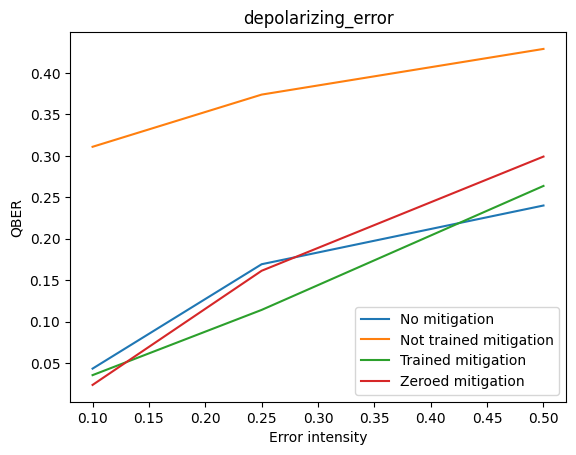

Noise function: amplitude_damping_error intensity: 0.1
Classic pipeline
Accuracy: 0.968503937007874 QBER: 0.03149606299212604
Trained pipeline
Start parameters {'x_6': np.float32(0.46565723), 'y_6': np.float32(-0.5122516), 'z_6': np.float32(0.5868838), 'x_7': np.float32(-0.93238854), 'y_7': np.float32(-0.61650527), 'z_7': np.float32(-0.30821455)}


/tmp/ipykernel_12179/2687710316.py:20: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  pipeline_train = BB84TrainableProtocol(n_bits=500, elements=[Layer(), channel_noise, Layer()], seed=0)


Before training: Accuracy: 0.8740157480314961 QBER: 0.12598425196850394
epoch: 0, loss: 0.11694228649139404
epoch: 10, loss: 0.017015572637319565
epoch: 20, loss: 0.006650582887232304
epoch: 30, loss: 0.002274916972965002
epoch: 40, loss: 0.0007523204549215734
epoch: 50, loss: 0.00027803698321804404
Final parameters {'x_6': np.float32(0.8720412), 'y_6': np.float32(-0.24786742), 'z_6': np.float32(0.8478973), 'x_7': np.float32(-0.7393247), 'y_7': np.float32(-0.46936172), 'z_7': np.float32(-0.7904736)}
After training: Accuracy: 0.9448818897637795 QBER: 0.055118110236220486
Zeroed parameters {'x_6': np.float32(0.0), 'y_6': np.float32(0.0), 'z_6': np.float32(0.0), 'x_7': np.float32(0.0), 'y_7': np.float32(0.0), 'z_7': np.float32(0.0)}
Zeroed mitigation: Accuracy: 0.9566929133858267 QBER: 0.04330708661417326
Noise function: amplitude_damping_error intensity: 0.25
Classic pipeline
Accuracy: 0.8976377952755905 QBER: 0.10236220472440949
Trained pipeline
Start parameters {'x_8': np.float32(0.387

/tmp/ipykernel_12179/2687710316.py:20: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  pipeline_train = BB84TrainableProtocol(n_bits=500, elements=[Layer(), channel_noise, Layer()], seed=0)


Before training: Accuracy: 0.6692913385826772 QBER: 0.3307086614173228
epoch: 0, loss: 0.3063511550426483
epoch: 10, loss: 0.05459126457571983
epoch: 20, loss: 0.013810372911393642
epoch: 30, loss: 0.0029837230686098337
epoch: 40, loss: 0.0005512744537554681
epoch: 50, loss: 0.00017502927221357822
Final parameters {'x_8': np.float32(0.51636624), 'y_8': np.float32(-0.17484388), 'z_8': np.float32(0.25059733), 'x_9': np.float32(-0.55068725), 'y_9': np.float32(0.048860323), 'z_9': np.float32(-0.29921976)}
After training: Accuracy: 0.9291338582677166 QBER: 0.07086614173228345
Zeroed parameters {'x_8': np.float32(0.0), 'y_8': np.float32(0.0), 'z_8': np.float32(0.0), 'x_9': np.float32(0.0), 'y_9': np.float32(0.0), 'z_9': np.float32(0.0)}
Zeroed mitigation: Accuracy: 0.8976377952755905 QBER: 0.10236220472440949
Noise function: amplitude_damping_error intensity: 0.5
Classic pipeline
Accuracy: 0.8267716535433071 QBER: 0.17322834645669294
Trained pipeline
Start parameters {'x_10': np.float32(0.67

/tmp/ipykernel_12179/2687710316.py:20: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  pipeline_train = BB84TrainableProtocol(n_bits=500, elements=[Layer(), channel_noise, Layer()], seed=0)


Before training: Accuracy: 0.562992125984252 QBER: 0.43700787401574803
epoch: 0, loss: 0.3733101785182953
epoch: 10, loss: 0.018543744459748268
epoch: 20, loss: 0.010045990347862244
epoch: 30, loss: 0.00788439903408289
epoch: 40, loss: 0.0007859266479499638
epoch: 50, loss: 0.000311375071760267
Final parameters {'x_10': np.float32(-0.07154786), 'y_10': np.float32(-0.021530343), 'z_10': np.float32(1.6915869), 'x_11': np.float32(-0.0067811185), 'y_11': np.float32(0.06447552), 'z_11': np.float32(-1.7076513)}
After training: Accuracy: 0.8149606299212598 QBER: 0.18503937007874016
Zeroed parameters {'x_10': np.float32(0.0), 'y_10': np.float32(0.0), 'z_10': np.float32(0.0), 'x_11': np.float32(0.0), 'y_11': np.float32(0.0), 'z_11': np.float32(0.0)}
Zeroed mitigation: Accuracy: 0.7795275590551181 QBER: 0.22047244094488194


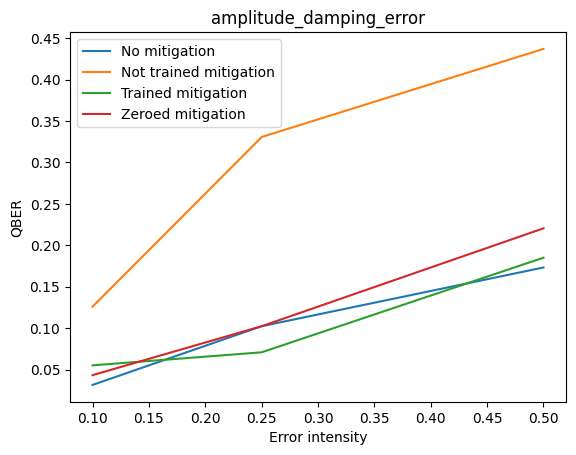

Noise function: phase_damping_error intensity: 0.1
Classic pipeline
Accuracy: 0.9763779527559056 QBER: 0.023622047244094446
Trained pipeline
Start parameters {'x_12': np.float32(-0.68325377), 'y_12': np.float32(0.92195475), 'z_12': np.float32(0.67897856), 'x_13': np.float32(-0.39713526), 'y_13': np.float32(-0.6346909), 'z_13': np.float32(0.9541683)}


/tmp/ipykernel_12179/2687710316.py:20: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  pipeline_train = BB84TrainableProtocol(n_bits=500, elements=[Layer(), channel_noise, Layer()], seed=0)


Before training: Accuracy: 0.6889763779527559 QBER: 0.3110236220472441
epoch: 0, loss: 0.35267725586891174
epoch: 10, loss: 0.02280324324965477
epoch: 20, loss: 0.007664560340344906
epoch: 30, loss: 0.008801757358014584
epoch: 40, loss: 0.00128982774913311
epoch: 50, loss: 1.4009819096827414e-05
Final parameters {'x_12': np.float32(-0.0691167), 'y_12': np.float32(1.3387264), 'z_12': np.float32(-0.038912058), 'x_13': np.float32(0.09930006), 'y_13': np.float32(-1.3375702), 'z_13': np.float32(-0.07161145)}
After training: Accuracy: 0.9921259842519685 QBER: 0.007874015748031482
Zeroed parameters {'x_12': np.float32(0.0), 'y_12': np.float32(0.0), 'z_12': np.float32(0.0), 'x_13': np.float32(0.0), 'y_13': np.float32(0.0), 'z_13': np.float32(0.0)}
Zeroed mitigation: Accuracy: 0.9763779527559056 QBER: 0.023622047244094446
Noise function: phase_damping_error intensity: 0.25
Classic pipeline
Accuracy: 0.9606299212598425 QBER: 0.03937007874015752
Trained pipeline
Start parameters {'x_14': np.float

/tmp/ipykernel_12179/2687710316.py:20: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  pipeline_train = BB84TrainableProtocol(n_bits=500, elements=[Layer(), channel_noise, Layer()], seed=0)


Before training: Accuracy: 0.84251968503937 QBER: 0.15748031496062997
epoch: 0, loss: 0.13374322652816772
epoch: 10, loss: 0.022018060088157654
epoch: 20, loss: 0.008257770910859108
epoch: 30, loss: 0.0024116963613778353
epoch: 40, loss: 0.000801242480520159
epoch: 50, loss: 0.0002848880540113896
Final parameters {'x_14': np.float32(-0.4669958), 'y_14': np.float32(0.3646039), 'z_14': np.float32(-0.43125495), 'x_15': np.float32(0.26710063), 'y_15': np.float32(-0.48168173), 'z_15': np.float32(0.27780864)}
After training: Accuracy: 0.968503937007874 QBER: 0.03149606299212604
Zeroed parameters {'x_14': np.float32(0.0), 'y_14': np.float32(0.0), 'z_14': np.float32(0.0), 'x_15': np.float32(0.0), 'y_15': np.float32(0.0), 'z_15': np.float32(0.0)}
Zeroed mitigation: Accuracy: 0.9645669291338582 QBER: 0.03543307086614178
Noise function: phase_damping_error intensity: 0.5
Classic pipeline
Accuracy: 0.952755905511811 QBER: 0.047244094488189003
Trained pipeline
Start parameters {'x_16': np.float32(-

/tmp/ipykernel_12179/2687710316.py:20: DeprecationWarning: Sampler has been deprecated as of Aer 0.15, please use SamplerV2 instead.
  pipeline_train = BB84TrainableProtocol(n_bits=500, elements=[Layer(), channel_noise, Layer()], seed=0)


Before training: Accuracy: 0.6535433070866141 QBER: 0.3464566929133859
epoch: 0, loss: 0.3082435429096222
epoch: 10, loss: 0.03932306170463562
epoch: 20, loss: 0.0014020680682733655
epoch: 30, loss: 0.0015746767167001963
epoch: 40, loss: 0.0021621568594127893
epoch: 50, loss: 0.0010069390991702676
Final parameters {'x_16': np.float32(-0.3210919), 'y_16': np.float32(-0.62482214), 'z_16': np.float32(0.4823159), 'x_17': np.float32(-0.055108074), 'y_17': np.float32(0.6558652), 'z_17': np.float32(-0.3990819)}
After training: Accuracy: 0.9173228346456693 QBER: 0.08267716535433067
Zeroed parameters {'x_16': np.float32(0.0), 'y_16': np.float32(0.0), 'z_16': np.float32(0.0), 'x_17': np.float32(0.0), 'y_17': np.float32(0.0), 'z_17': np.float32(0.0)}
Zeroed mitigation: Accuracy: 0.937007874015748 QBER: 0.06299212598425197


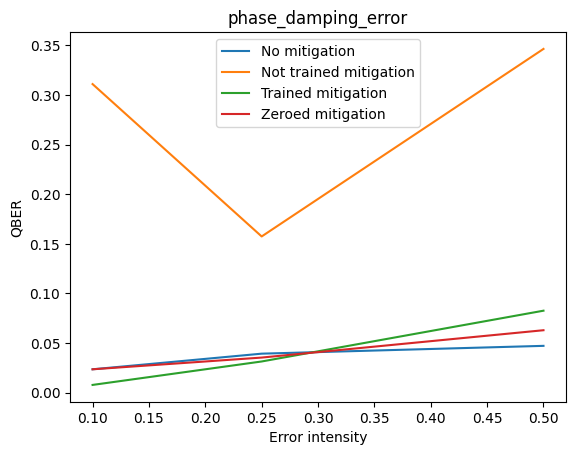

In [2]:
import numpy as np
from qiskit_aer.noise import depolarizing_error, amplitude_damping_error, phase_damping_error

noise_functions = {"depolarizing_error": lambda p: depolarizing_error(p, 1),
                   "amplitude_damping_error": amplitude_damping_error,
                   "phase_damping_error": phase_damping_error}

error_intensities = [0.1, 0.25, 0.5]

for name, noise in noise_functions.items():
    qber_results = []
    for p in error_intensities:
        print("========================")
        print(f"Noise function: {name} intensity: {p}")
        qber_results.append(experiment(noise(p)))
    qber_results = np.array(qber_results).T
    plt.plot(error_intensities, qber_results[0], label="No mitigation")
    plt.plot(error_intensities, qber_results[1], label="Not trained mitigation")
    plt.plot(error_intensities, qber_results[2], label="Trained mitigation")
    plt.plot(error_intensities, qber_results[3], label="Zeroed mitigation")
    plt.title(name)
    plt.xlabel("Error intensity")
    plt.ylabel("QBER")
    plt.legend()
    plt.show()
